In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="muted", font_scale=1.5)
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
columns=['user', 'idiot_test', 'complete_first_step', 'passed_first_step', 'nabor_rejected',\
         'been_suspicious', 'assignment_auto_sent', 'assignment_sent', 'accepted_by_workshop', \
         'declined_by_workshop', 'locked_to_workshop', 'main_occupation', 'hobbies', 'finished_ed',\
         'affiliation','wait_but_why', 'workshop_slug', 'money','relevant_skills','motivation', \
         'been_before', 'leakage_source', 'nostalgia']

names = {u'L10n' : u'М. локализации', u'photo' : u'Фотография',\
         u'travel-journ' : u'Тревел-журналистика', u'sci-pub' : u'ШНЖ', u'andan' : u'АнДан',\
         u'design' : u'Дизайн', u'organizer' : u'Образование', u'psycho' : u'Психология',\
         u'sport-journ' : u'Спорт. журналистика', u'medo' : u'МедО', u'theatre_live' : u'Живой театр',\
         u'litkult' : u'ЛитКульт', u'urban' : u'Урбанистика', u'dok-kino' : u'Док. кино',\
         u'human-rights' : u'Права человека', u'philosophy' : u'Философия', u'illustration' : u'Иллюстрация',\
         u'evolve' : u'Эволюция медиа', u'ecos' : u'ЭКОС', u'report' : u'Репортаж (текст)',\
         u'sverkh-journ' : u'Сверхъест. журналистика', u'astrogeo' : u'АстроГео',\
         u'hudkino' : u'Худ. кино', u'total_journalism' : u'Тот. журналистика',\
         u'report_photo' : u'Репортаж (фото)', u'enot' : u'ЕНОТ', u'social' : u'СоцО',\
         u'lang-brain' : u'Язык-мозг', u'lingvo-research' : u'Лингв. исследований',\
         u'datascience' : u'Data sci'
}

In [8]:
d={}

with open('ds/user_bucks_no_intentions.json') as data1:
    j=json.load(data1)
for line in j:
    #print line
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            d[id1]={}
            d[id1]['user'] = id1
        if fields['slug']=='passed_idiot_test':
            d[id1]['idiot_test']=fields['when']
        elif fields['slug']=='complete_first_step':
            d[id1]['complete_first_step']=fields['when'] 
        elif fields['slug']=='been_suspicious':
            d[id1]['been_suspicious']=fields['when'] 
        
        elif fields['slug']=='passed_first_step':
            d[id1]['passed_first_step']=fields['when']
        
        elif fields['slug']=='nabor_rejected':
            d[id1]['nabor_rejected']=fields['when']
        
        elif fields['slug']=='assignment_auto_sent':
            d[id1]['assignment_auto_sent']=fields['when']    
        elif fields['slug']=='assignment_sent':
            d[id1]['assignment_sent']=fields['when'] 
        
        elif fields['slug']=='accepted_by_workshop':
            d[id1]['accepted_by_workshop']=fields['when']
        
        elif fields['slug']=='declined_by_workshop':
            d[id1]['declined_by_workshop']=fields['when'] 
        
        elif fields['slug']=='locked_to_workshop':
            d[id1]['locked_to_workshop']=fields['when']
   
    except Exception:
        print '1'
        pass
###########################################################################################
with open('ds/useractivityinfo.json') as data2:
    j=json.load(data2)
for line in j:
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            
            d[id1]={}
            d[id1]['user'] = id1    
        d[id1]['main_occupation']=fields['main_occupation']
        d[id1]['hobbies']=fields['hobbies']
    except Exception:
        print '2'
        pass
###########################################################################################
with open('ds/usereducationinfo.json') as data3:
    j=json.load(data3)
for line in j:
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            
            d[id1]={}
            d[id1]['user'] = id1    
        d[id1]['affiliation']=fields['affiliation']
        d[id1]['finished_ed']=fields['finished_ed']
    except Exception:
        print '3'
        pass
###########################################################################################
with open('ds/workshoppetitionconnection.json') as data4:
    j=json.load(data4)
for line in j:
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            
            d[id1]={}
            d[id1]['user'] = id1    
        d[id1]['wait_but_why']=fields['wait_but_why']
        d[id1]['workshop_slug']=fields['workshop_slug']
    except Exception:
        print '4'
        pass
###########################################################################################
with open('ds/givebackinfo.json') as data5:
    j=json.load(data5)
for line in j:
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            
            d[id1]={}
            d[id1]['user'] = id1    
        d[id1]['money']=fields['money']
        d[id1]['relevant_skills']=fields['relevant_skills']
    except Exception:
        print '5'
        pass
###########################################################################################
with open('ds/pastfuturepresentinfo.json') as data6:
    j=json.load(data6)
for line in j:
    try:
        fields = line['fields']
        id1=fields['user']
        if not(id1 in d) :
            
            d[id1]={}
            d[id1]['user'] = id1    
        d[id1]['motivation']=fields['motivation']
        d[id1]['been_before']=fields['been_before']
        
        d[id1]['leakage_source']=fields['leakage_source']
        d[id1]['nostalgia']=fields['nostalgia']
    except Exception:
        print '6'
        pass
###########################################################################################


data = pd.DataFrame(d.values(), columns=columns)

In [9]:
data = data[data.user != 2]

data.shape

(3466, 23)

In [10]:
len(data['complete_first_step'][data['complete_first_step'].notnull()])

2324

## Скорость прохождения анкет

In [15]:
data['all_time'] = pd.to_datetime(data['accepted_by_workshop']) - pd.to_datetime(data['complete_first_step'])

time = data[['workshop_slug', 'all_time']][data['all_time'].notnull()]

time['all_time_2'] = time['all_time'] / (np.timedelta64(1, 'D'))

In [16]:
from collections import defaultdict
anketa_data = defaultdict(list)
for element in time.values:
    anketa_data[element[0]].append(element[2])
    
anketa_means = {}
anketa_stds = {}
for element in anketa_data:
    anketa_means[element] = np.mean(np.array(anketa_data[element]))
    anketa_stds[element] = np.std(np.array(anketa_data[element]))

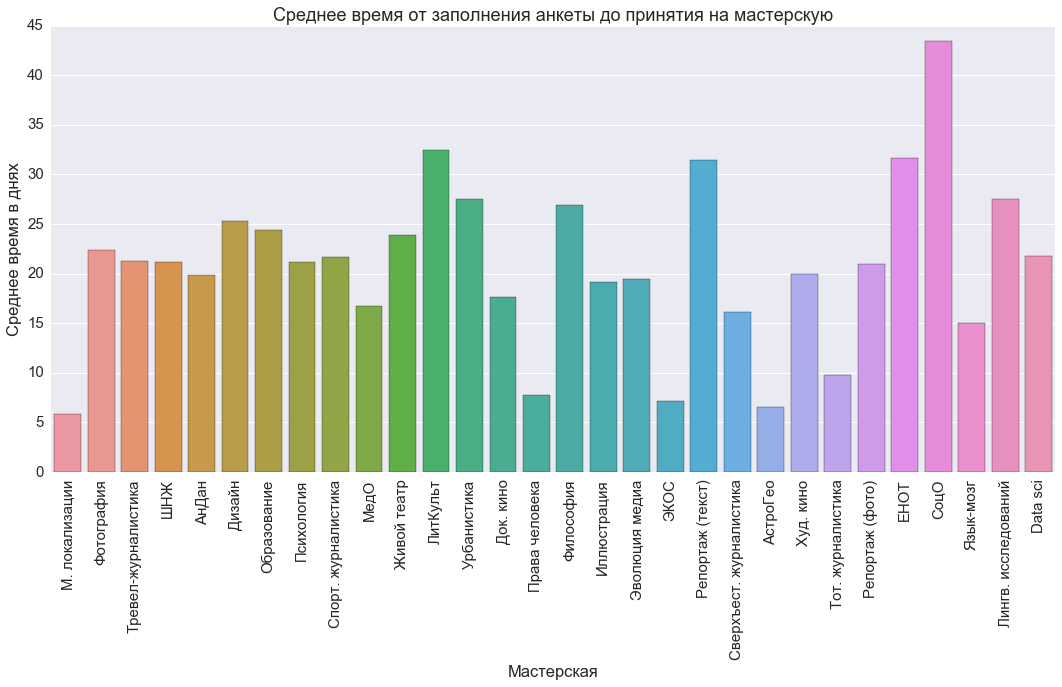

In [18]:
plt.figure(1, figsize=(18,8))


anketa_data.keys()  

ax = sns.barplot(x=anketa_data.keys(), y=anketa_means.values())

plt.xticks(range(len(anketa_data)), [names[w] for w in anketa_data.keys()], rotation = 'vertical')


plt.title(u'Среднее время от заполнения анкеты до принятия на мастерскую')
plt.xlabel(u'Мастерская')
plt.ylabel(u'Среднее время в днях')

In [19]:
plot_ans = {}
for elem in anketa_data.keys():
    plot_ans[elem] = sum(anketa_data[elem]) / len(anketa_data[elem])

In [20]:
print 'mean - std: ', np.array(anketa_means.values()).mean() - np.array(anketa_means.values()).std()
print 'mean: ', np.array(anketa_means.values()).mean()
print 'mean + std: ', np.array(anketa_means.values()).mean() + np.array(anketa_means.values()).std()

print '\n'

print '25% percentile: ', np.percentile(np.array(anketa_means.values()), 25)
print 'median (50% percentile) ', np.percentile(np.array(anketa_means.values()), 50)
print '75% percentile: ', np.percentile(np.array(anketa_means.values()), 75)

mean - std:  12.599511977
mean:  20.8626411012
mean + std:  29.1257702254


25% percentile:  16.9513241167
median (50% percentile)  21.1750192267
75% percentile:  25.0966247273


Среднее время прохождения анкеты 20 дней 20 часов, стандартное отклонение 8 дней 6 часов.

Долгие мастерские (дольше mean + std, 29 дней 3 часа):

 - Мастерская репортажа (report) 31 день 11 часов
 - ЕНОТ (enot) 31 день 14 часов
 - Мастерская Литкульт (litkult) 32 дня 12 часов
 - СоцО (social) 43 дня 10 часов
 
Среднее 20 дней 20 часов.

Data science 21 день 19 часов.

Быстрые мастерские (меньше mean - std, 12 дней 14 часов):

 - Мастерская Локализации (L10n) 5 дней 20 часов
 - АстроГео (astrogeo) 6 дней 13 часов
 - ЭКОС (ecos) 7 дней 3 часа
 - Права человека (human-rights) 7 дней 17 часов
 - Мастерская тотальной журналистики (total_journalism) 9 дней 18 часов

## Среднее время заполнения анкеты (first_step - idiot_test)

In [21]:
data['first_step'] = pd.to_datetime(data['complete_first_step']) - pd.to_datetime(data['idiot_test'])

fs = data[['workshop_slug', 'first_step']][data['accepted_by_workshop'].notnull()]

fs['first_step_2'] = fs['first_step'] / (np.timedelta64(1, 'D'))

In [22]:
fs_data = defaultdict(list)
for element in fs.values:
    # check for NaN
    if element[2] == element[2]:
        fs_data[element[0]].append(element[2])

In [23]:
plot_fs_ans = {}
for elem in fs_data.keys():
    plot_fs_ans[elem] = sum(fs_data[elem]) / len(fs_data[elem])
    print elem, sum(fs_data[elem]) / len(fs_data[elem])

L10n 3.14524309398
photo 5.32769596154
travel-journ 0.314863179398
sci-pub 4.84170742126
andan 6.66071395015
design 1.44817815779
organizer 4.81606404204
psycho 2.50385608639
sport-journ 1.42948199805
medo 2.22789396968
theatre_live 1.87051429919
litkult 0.493974964451
urban 2.197563516
dok-kino 3.57415982639
human-rights 1.60316777705
philosophy 4.5877921142
illustration 2.49579391975
evolve 2.62135874306
ecos 5.25583628429
report 3.34733538408
sverkh-journ 1.02006988698
astrogeo 2.8319403905
hudkino 2.63412770754
total_journalism 3.93789286265
report_photo 3.96980345044
enot 3.28102575439
social 4.2715602908
lang-brain 1.99210958488
lingvo-research 3.77159006221
datascience 5.28802779175


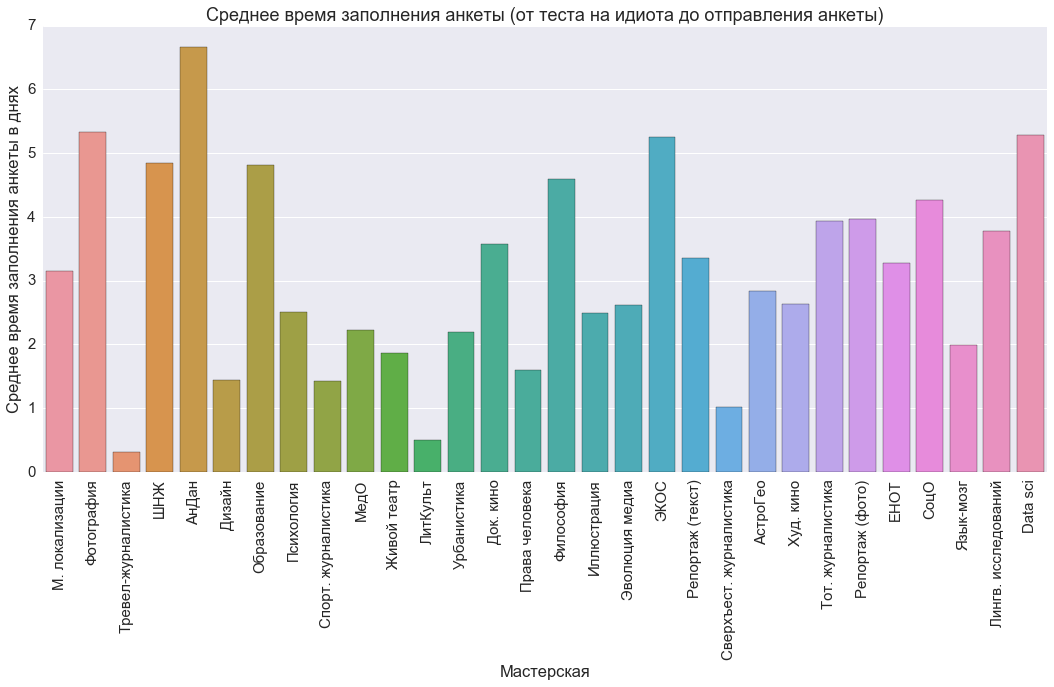

In [24]:
plt.figure(1, figsize=(18,8))

plot_fs_ans

ax = sns.barplot(x=plot_fs_ans.keys(), y=plot_fs_ans.values())

plt.xticks(range(len(plot_ans)), [names[w] for w in plot_fs_ans.keys()], rotation = 'vertical')


plt.title(u'Среднее время заполнения анкеты (от теста на идиота до отправления анкеты)')
plt.ylabel(u'Среднее время заполнения анкеты в днях')
plt.xlabel(u'Мастерская')

In [25]:
print 'mean - std: ', np.array(plot_fs_ans.values()).mean() - np.array(plot_fs_ans.values()).std()
print 'mean: ', np.array(plot_fs_ans.values()).mean()
print 'mean + std: ', np.array(plot_fs_ans.values()).mean() + np.array(plot_fs_ans.values()).std()
print 'std: ', np.array(plot_fs_ans.values()).std()

print '\n'

print '25% percentile: ', np.percentile(np.array(plot_fs_ans.values()), 25)
print 'median (50% percentile) ', np.percentile(np.array(plot_fs_ans.values()), 50)
print '75% percentile: ', np.percentile(np.array(plot_fs_ans.values()), 75)

mean - std:  1.58656211693
mean:  3.12537808236
mean + std:  4.6641940478
std:  1.53881596543


25% percentile:  2.04347306766
median (50% percentile)  2.98859174224
75% percentile:  4.19612108071


Среднее время прохождения анкеты 3 дня 3 часа, стандартное отклонение 1 день 13 часов.

Медленные мастерские (дольше mean + std, 4 дня 16 часов):

 - АнДан (andan) 6.66071395015
 - Мастерская фотографии (photo) 5.32769596154
 - datascience 5.28802779175
 - ЭКОС (ecos) 5.25583628429
 - ШНЖ (sci-pub) 4.84170742126
 - Образование (organizer) 4.81606404204
 
Среднее 3 дня 3 часа

Data science 5 дней 7 часов.

Быстрые мастерские (меньше mean - std, 1 день 14 часов):

 - Мастерская тревел-журналистики (travel-journ) 0.314863179398
 - Литкульт (litkult) 0.493974964451
 - Сверхъестественная журналистика (sverkh-journ) 1.02006988698
 - Спортивная журналистика (sport-journ) 1.42948199805
 - Мастерская дизайна (design) 1.44817815779


### correlation and veterans

In [64]:
ind = np.logical_and(data['been_before'].notnull().values, data['accepted_by_workshop'].notnull().values)
ind2 = np.logical_and(data['been_before'].isnull().values, data['accepted_by_workshop'].notnull().values) 

In [77]:
from collections import Counter
count = Counter()
count2 = Counter()
count3 = Counter()

for elem in data['workshop_slug'][ind].values:
    count[elem] += 1
    
for elem in data['workshop_slug'][ind2].values:
    count2[elem] += 1

for elem in names.keys():
    count3[elem] = float(count[elem])/(count[elem] + count2[elem])

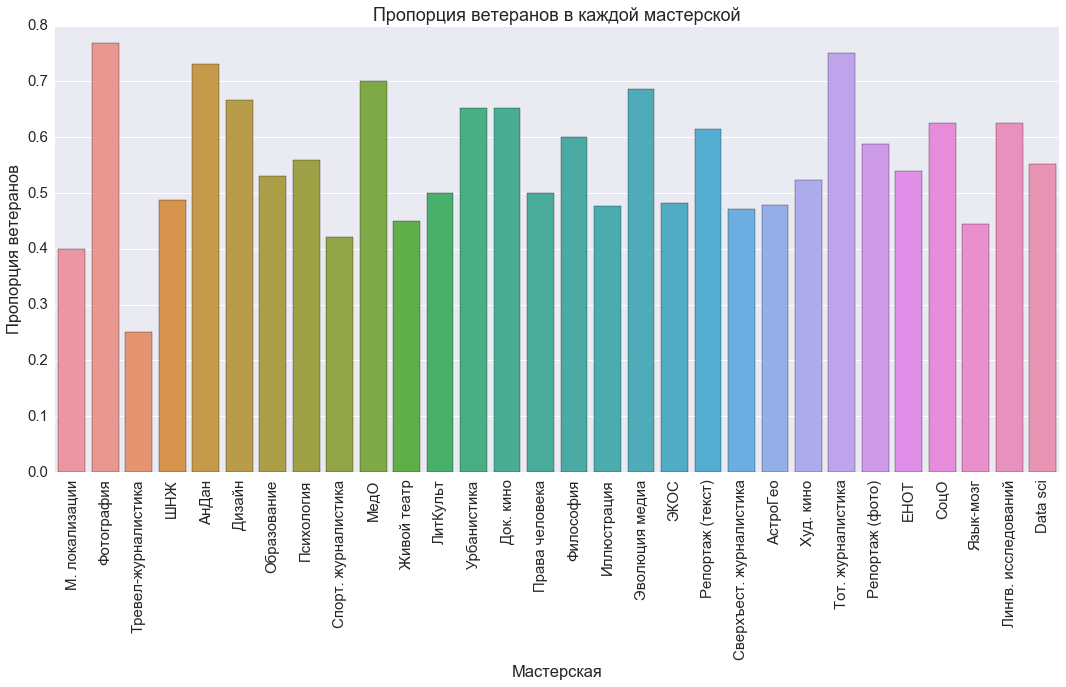

In [169]:
plt.figure(1, figsize=(18,8))

plot_fs_ans

ax = sns.barplot(x=count3.keys(), y=count3.values())

plt.xticks(range(len(count3)), [names[w] for w in count3.keys()], rotation = 'vertical')


plt.title(u'Пропорция ветеранов в каждой мастерской')
plt.ylabel(u'Пропорция ветеранов')
plt.xlabel(u'Мастерская')

In [172]:
print 'mean - std: ', np.mean(count3.values()) - np.std(count3.values())
print 'mean: ', np.mean(count3.values())
print 'mean + std: ', np.mean(count3.values()) + np.std(count3.values())
print 'std: ', np.std(count3.values())

print '\n'

print '25%-процентиль: ', np.percentile(count3.values(), 25)
print '50%-процентиль: ', np.percentile(count3.values(), 50)
print '75%-процентиль: ', np.percentile(count3.values(), 75)

mean - std:  0.442514316914
mean:  0.557457629074
mean + std:  0.672400941235
std:  0.11494331216


25%-процентиль:  0.479066022544
50%-процентиль:  0.545092838196
75%-процентиль:  0.645380434783


В среднем в каждой мастерской 55% участников уже бывали в ЛШ. 

Мастерские с наиболее свежей кровью:
 
 - Тревел-журналистика (travel-journ), 25% ветеранов
 - М. локализации (L10n), 40% ветеранов
 - Спорт. журналистика (sport-journ) 42% ветеранов 


В datas sci  55% ветеранов.

Мастерские с наибольшей пропорцией ветеранов:

 - Фотография (photo) 79% ветеранов 
 - Тот. журналистика (total_journalism) 75% ветеранов 
 - АнДан (andan) 73% ветеранов 
 - МедО (medo) 70% ветеранов 
 - Эволюция медиа (evolve) 69% ветеранов

In [137]:
d = {'name' : pd.Series(names.keys()),
    'proportion' : pd.Series(count3.values()),
    'time' : pd.Series(plot_fs_ans.values())}

df = pd.DataFrame(d)

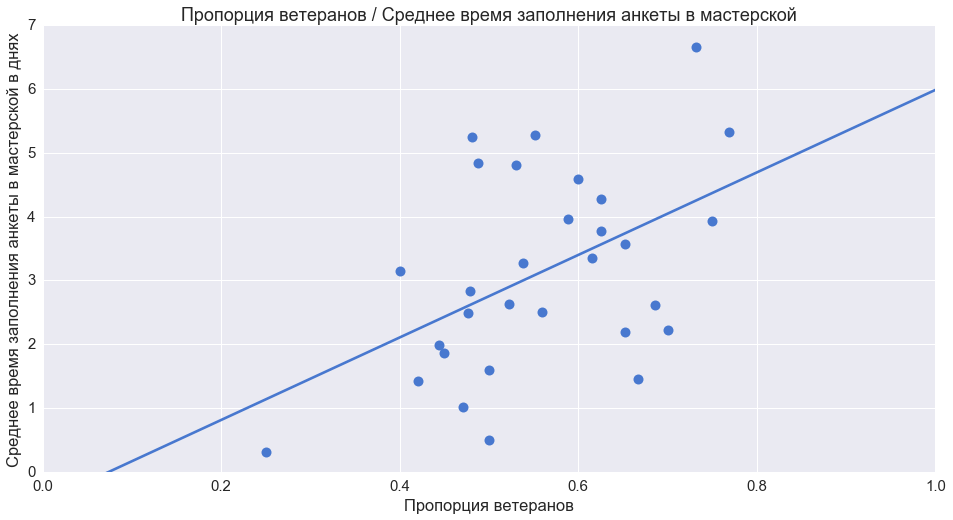

In [165]:
plt.figure(1, figsize=(16,8))

plt.xlim(0,1)
plt.ylim(0,7)

sns.regplot('proportion', 'time', df, ci = None, scatter_kws={"s": 100, "alpha": 1})

plt.title(u'Пропорция ветеранов / Среднее время заполнения анкеты в мастерской')
plt.ylabel(u'Среднее время заполнения анкеты в мастерской в днях')
plt.xlabel(u'Пропорция ветеранов')


похоже на нормальное распределение

## как много анкет, прошедших тест на идиота, в итоге не прошли дальше


In [50]:
print data.shape
print len(data['idiot_test'][data['idiot_test'].notnull()])
print len(data['accepted_by_workshop'][data['accepted_by_workshop'].notnull()])
print 'been before: ', len(data['been_before'][data['been_before'].notnull()])

(3466, 25)
3402
978
been before:  1359


Из 3467 анкет всего почти все (3403) прошли тест на идиота. Однако принято в мастерские всего 978 человек (~29%).

Так же 1359 отметили, что были в ЛШ ранее.

## Сколько денег обещает какая мастерская (учесть длительности мастерских)

In [27]:
index = np.logical_and(data['money'].notnull().values, data['accepted_by_workshop'].notnull().values)

In [28]:
print len(data['money'][data['money'].notnull()]), 'человек указали сумму, которую они согласны внести'
print len(data['money'][index]), 'человек указали сумму и были приняты в мастерскую'

2039 человек указали сумму, которую они согласны внести
774 человек указали сумму и были приняты в мастерскую


In [29]:
money = data[['workshop_slug', 'money']][index]

def strtoint(stroka):
    try:
        return int(stroka)
    except:
        return int(stroka[1:])

money_data = defaultdict(list)
for element in money.values:
    money_data[element[0]].append(strtoint(element[1]))

del money_data[money_data.keys()[0]]

with open('slug.txt', 'r') as f:
    cycles = json.loads(f.read())

In [30]:
money_sum = {}
money_per_cycle = {}
for elem in money_data.keys():
    try:
        money_sum[elem] = sum(money_data[elem])
        money_per_cycle[elem] = float(sum(money_data[elem])) / cycles[elem]
    except:
        print '1 nan except'

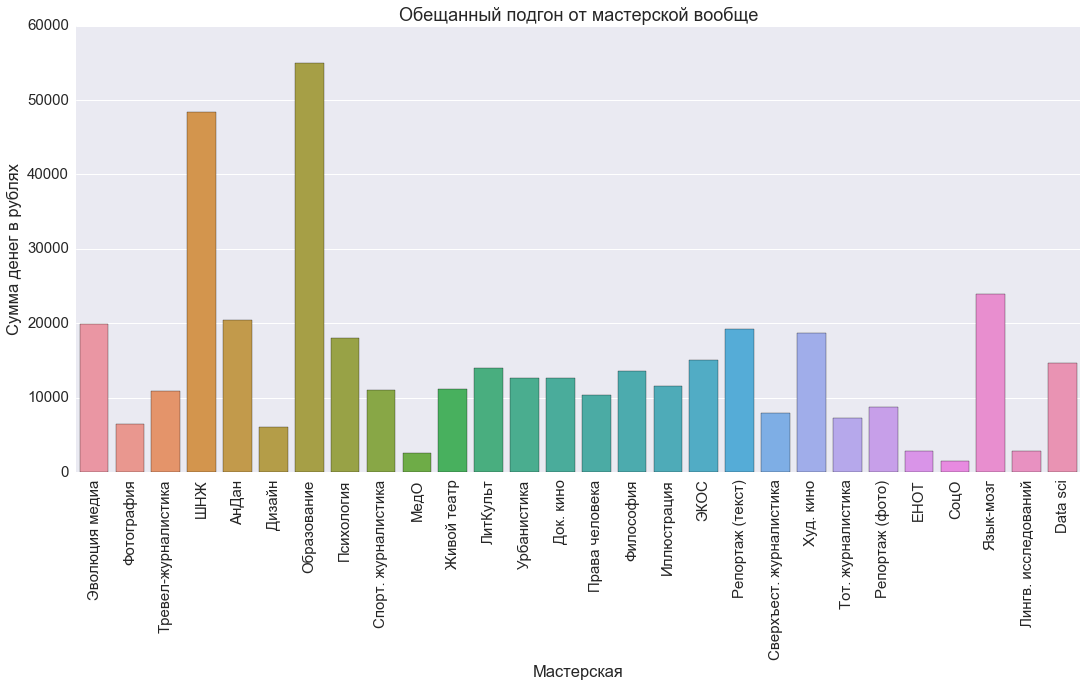

In [31]:
plt.figure(1, figsize=(18,8))


money_sum

ax = sns.barplot(x=money_sum.keys(), y=money_sum.values())

plt.xticks(range(len(money_sum)), [names[w] for w in money_sum.keys()], rotation = 'vertical')


plt.title(u'Обещанный подгон от мастерской вообще')
plt.ylabel(u'Сумма денег в рублях')
plt.xlabel(u'Мастерская')

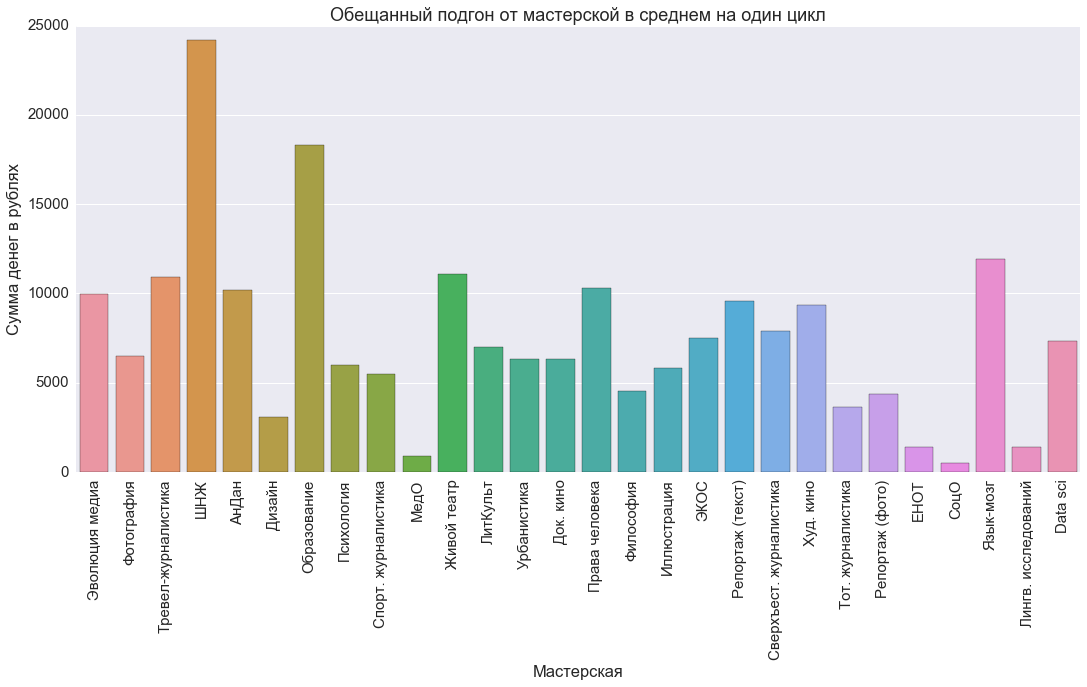

In [32]:
plt.figure(1, figsize=(18,8))

money_per_cycle

ax = sns.barplot(x=money_per_cycle.keys(), y=money_per_cycle.values())

plt.xticks(range(len(money_per_cycle)), [names[w] for w in money_per_cycle.keys()], rotation = 'vertical')


plt.title(u'Обещанный подгон от мастерской в среднем на один цикл')
plt.ylabel(u'Сумма денег в рублях')
plt.xlabel(u'Мастерская')

In [33]:
gg = np.array(money_per_cycle.values())

print 'mean - std: ', gg.mean() - gg.std()
print 'mean: ', gg.mean()
print 'mean + std: ', gg.mean() + gg.std()
print 'std: ', gg.std()

print '\n'

print '25% percentile: ', np.percentile(gg, 25)
print 'median (50% percentile) ', np.percentile(gg, 50)
print '75% percentile: ', np.percentile(gg, 75)

mean - std:  2552.04540406
mean:  7562.5
mean + std:  12572.9545959
std:  5010.45459594


25% percentile:  4487.5
median (50% percentile)  6750.0
75% percentile:  10012.5


В среднем мастерской на цикл обещано 7350 рублей

Денежные мастерские (больше mean + std, 12572 рубля):

 - ШНЖ (sci-pub) 24200 рублей
 - Мастерская образование (organizer) 18300 рублей

 
Среднее 7350 рублей
Data science 7350.0 рублей 

Бедные мастерские (меньше mean - std, 2552 рублей):

 - СоцО (social) 500 рублей
 - МедО (medo) 866.66 рублей
 - ЕНОТ (enot) 1400 рублей
 - Лингвистических исследований (lingvo-research) 1400 рублей

In [34]:
num_of_people = money['workshop_slug'].value_counts().to_dict()

print len(num_of_people)
money_per_person = {}
for elem in money_sum.keys():
    money_per_person[elem] = float(money_sum[elem]) / num_of_people[elem]

29


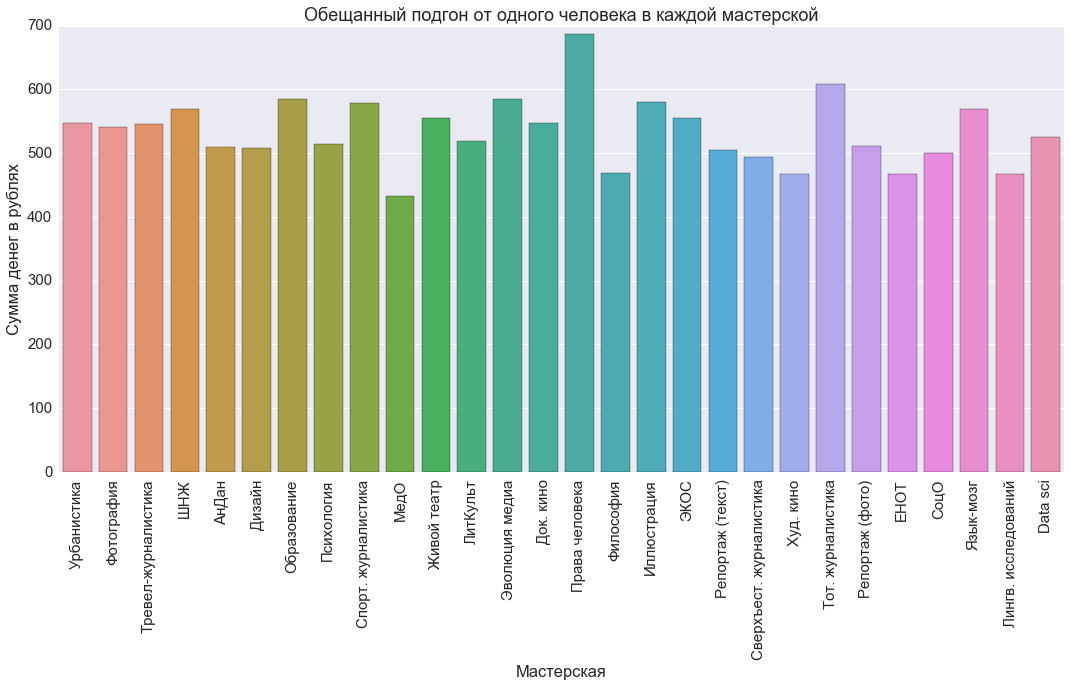

In [35]:
plt.figure(1, figsize=(18,8))

money_per_person

ax = sns.barplot(x=money_per_person.keys(), y=money_per_person.values())

plt.xticks(range(len(money_per_person)), [names[w] for w in money_per_person.keys()], rotation = 'vertical')

plt.title(u'Обещанный подгон от одного человека в каждой мастерской')
plt.ylabel(u'Сумма денег в рублях')
plt.xlabel(u'Мастерская')

#plt.savefig('Рабочий стол/ex.png', bbox_inches='tight')

In [36]:
yy = np.array(money_per_person.values())

print 'mean - std: ', yy.mean() - yy.std()
print 'mean: ', yy.mean()
print 'mean + std: ', yy.mean() + yy.std()
print 'std: ', yy.std()

print '\n'

print '25% percentile: ', np.percentile(yy, 25)
print 'median (50% percentile) ', np.percentile(yy, 50)
print '75% percentile: ', np.percentile(yy, 75)

mean - std:  481.657836632
mean:  533.738051178
mean + std:  585.818265723
std:  52.0802145457


25% percentile:  503.947368421
median (50% percentile)  533.333333333
75% percentile:  569.138655462


В среднем человек обещает 533 рубля

Самые щедрые люди в следующих мастерских (больше mean + std, 585 рублей):

 - Права человека (human-rights) 686.66 рублей
 - Мастерская тотальной журналистики (total_journalism) 608.33 рублей


Data science 525 рублей

Среднее 533 рубля


Некоторые финансовые трудности испытывают в следующих мастерских (меньше mean - std, 481 рубль):

- МедО (medo) 433.33 рублей
- ЕНОТ (enot) 466.66 рублей
- Лингвистических исследований (lingvo-research) 466.66 рублей
- МуХуК (hudkino) 467.5 рублей
- Мастерская философии (philosophy) 468.96 рублей

## Какие мастерские самые образованные

In [37]:
from collections import Counter
ww = Counter()
for elem in data['finished_ed'][data['finished_ed'].notnull()].values:
    ww[elem] += 1

#### шкала (я так чувствую, возможно переосмысление)

1: 10 баллов   

 - (201600, u'учусь в школе'),
 - (201603, u'учусь в среднем специальном учебном заведении'),
 - (201604, u'учусь в начальном профессиональном учебном заведении'),

2: 12 баллов

 - (201605, u'закончил школу'),
 - (201606, u'закончил ПТУ'),
 - (201607, u'среднее'),
  
3: 15 баллов

 - (201601, u'учусь в ВУЗе в бакалавриате'),
   
4: 20 баллов
  
 - (201608, u'бакалавриат'),
 - (201602, u'учусь в ВУЗе в магистратуре'),
 - (201609, u'закончил магистратуру'),
   
5: 25 баллов

 - (201610, u'учусь в ординатуре'),
 - (201611, u'учусь в интернатуре'),
 - (201612, u'учусь в адъюнктуре'),
 - (201613, u'учусь в аспирантуре'),
  
6: 30 баллов

 - (201615, u'являюсь кандидатом наук'),
 - (201614, u'учусь в докторантуре'),
  
7: 40 баллов

 - (201616, u'являюсь доктором наук')

In [38]:
def getEdScore(code):
    if code in (201600, 201603, 201604):
        return 10
    elif code in (201605, 201606, 201607):
        return 12
    elif code == 201601:
        return 15
    elif code in (201608, 201602, 201609):
        return 20
    elif code in (201610, 201611, 201612, 201613):
        return 25
    elif code in (201615, 201614):
        return 30
    elif code == 201616:
        return 40

In [39]:
index = np.logical_and(data['finished_ed'].notnull().values, data['accepted_by_workshop'].notnull().values)
arr = data[['workshop_slug', 'finished_ed']][index].values

In [40]:
num_of_people = data['workshop_slug'][index].value_counts().to_dict()

In [41]:
from collections import Counter
workshop_ed_levels = Counter()
for element in arr:
    workshop_ed_levels[element[0]] += getEdScore(element[1])    

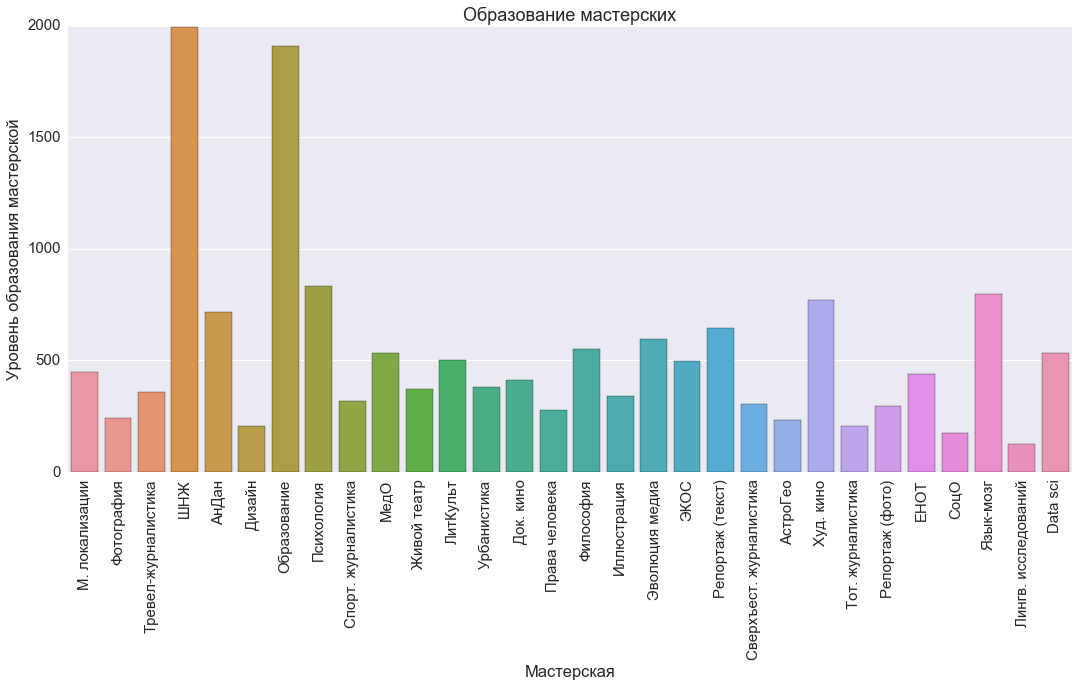

In [42]:
plt.figure(1, figsize=(18,8))

workshop_ed_levels

ax = sns.barplot(x=workshop_ed_levels.keys(), y=workshop_ed_levels.values())

plt.xticks(range(len(workshop_ed_levels)), [names[w] for w in workshop_ed_levels.keys()], rotation = 'vertical')

plt.title(u'Образование мастерских')
plt.ylabel(u'Уровень образования мастерской')
plt.xlabel(u'Мастерская')

#plt.savefig('Рабочий стол/ex.png', bbox_inches='tight')

In [43]:
workshop_ed_per_person = {}
for elem in workshop_ed_levels.keys():
    workshop_ed_per_person[elem] = float(workshop_ed_levels[elem]) / num_of_people[elem]

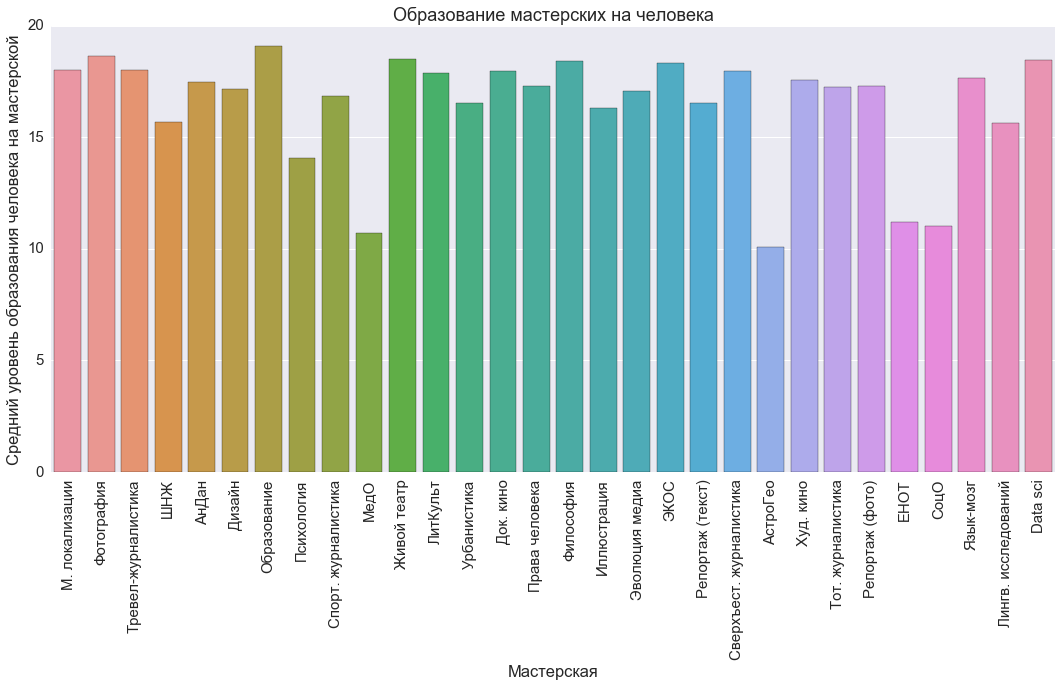

In [44]:
plt.figure(1, figsize=(18,8))

workshop_ed_levels

ax = sns.barplot(x=workshop_ed_per_person.keys(), y=workshop_ed_per_person.values())

plt.xticks(range(len(workshop_ed_per_person)), [names[w] for w in workshop_ed_per_person.keys()], rotation = 'vertical')

plt.title(u'Образование мастерских на человека')
plt.ylabel(u'Средний уровень образования человека на мастерской')
plt.xlabel(u'Мастерская')

#plt.savefig('Рабочий стол/ex.png', bbox_inches='tight')

In [45]:
aaa = np.array(workshop_ed_per_person.values())
print aaa.mean() - aaa.std(), aaa.mean(), aaa.mean() + aaa.std()

14.0125741488 16.4823812397 18.9521883306


In [46]:
for elem in workshop_ed_per_person:
    if workshop_ed_per_person[elem] < aaa.mean() - aaa.std():
        print elem, workshop_ed_per_person[elem]

print '\n'
print 'mean: ', aaa.mean()
print workshop_ed_per_person['datascience']
print '\n'

for elem in workshop_ed_per_person:
    if workshop_ed_per_person[elem] > aaa.mean() + aaa.std():
        print elem, workshop_ed_per_person[elem]

medo 10.7
astrogeo 10.0869565217
enot 11.2051282051
social 11.0


mean:  16.4823812397
18.4482758621


organizer 19.09


### ML for suspicious users

In [181]:
ind = np.logical_and(data['been_suspicious'].notnull(), data['accepted_by_workshop'].notnull())
ind2 = np.logical_and(data['been_suspicious'].notnull(), data['accepted_by_workshop'].isnull())

In [182]:
print 'Num of suspicious users: ', len(data[data['been_suspicious'].notnull()])
print 'Num of suspicious users, who got accepted: ', len(data[ind])
print 'Num of suspicious users, who didn\'t get to school: ', len(data[ind2])

Num of suspicious users:  199
Num of suspicious users, who got accepted:  55
Num of suspicious users, who didn't get to school:  144


In [185]:
ml_columns=['user', 'been_suspicious', 'accepted_by_workshop', 'declined_by_workshop', 'main_occupation',\
            'hobbies', 'finished_ed', 'affiliation','wait_but_why', 'workshop_slug', 'money',\
            'relevant_skills','motivation', 'been_before', 'leakage_source', 'nostalgia']

df = data[ml_columns]

In [208]:
def get_anket(ind):
    for elem in ml_columns:
        print '\n' + elem + ': ', data[ml_columns].iloc[[ind]][elem].values[0]

In [204]:
data[ml_columns].iloc[[0]]

,user,been_suspicious,accepted_by_workshop,declined_by_workshop,main_occupation,hobbies,finished_ed,affiliation,wait_but_why,workshop_slug,money,relevant_skills,motivation,been_before,leakage_source,nostalgia
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
np.arange(3466)[ind.values]

array([  61,  177,  390,  404,  413,  462,  506,  518,  625,  686,  714,
        730,  774,  801,  936, 1006, 1010, 1030, 1232, 1242, 1312, 1350,
       1358, 1454, 1479, 1596, 1666, 1675, 1684, 1819, 1894, 1992, 2043,
       2047, 2118, 2119, 2155, 2224, 2275, 2408, 2438, 2468, 2559, 2647,
       2714, 2727, 2729, 2792, 2883, 3102, 3110, 3240, 3275, 3288, 3291])

In [226]:
get_anket(61)


user:  87

been_suspicious:  2016-04-09T20:28:20.296Z

accepted_by_workshop:  2016-05-30T19:29:30.327Z

declined_by_workshop:  nan

main_occupation:  Школа, подготовка к экзаменам и выполнение домашнего задания

hobbies:  музыка. играю на гитаре и фортепьяно, а так же нравятся многие предметы в школе 

finished_ed:  201600.0

affiliation:  ЧОУ ОСШ

wait_but_why:  именно это направление потому что невозможно выбрать другое, после знакомства с этой мастерской. Ну и конечно же интерес к гуманитарным предметам. 

workshop_slug:  social

money:  None

relevant_skills:  {u'skills': [u'BYT'], u'skills_other': u''}

motivation:  Узнать много нового, улучшить навыки к выбранном направлении. а кроме того хорошо провести время на берегу Волге в хорошей компании. 

been_before:  []

leakage_source:  {u'src_select': [u'0'], u'src_other': u''}

nostalgia:  Это было лучшим летом.
